# Глава 10: Линейная регрессия

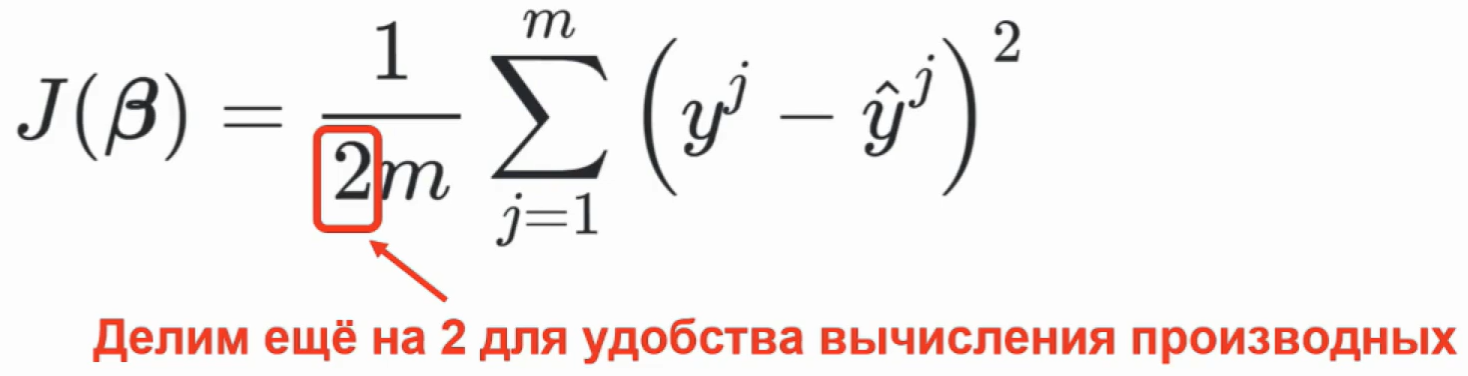

### **Метод градинетного спуска** - это численный метод нахождения минимума функции потерь

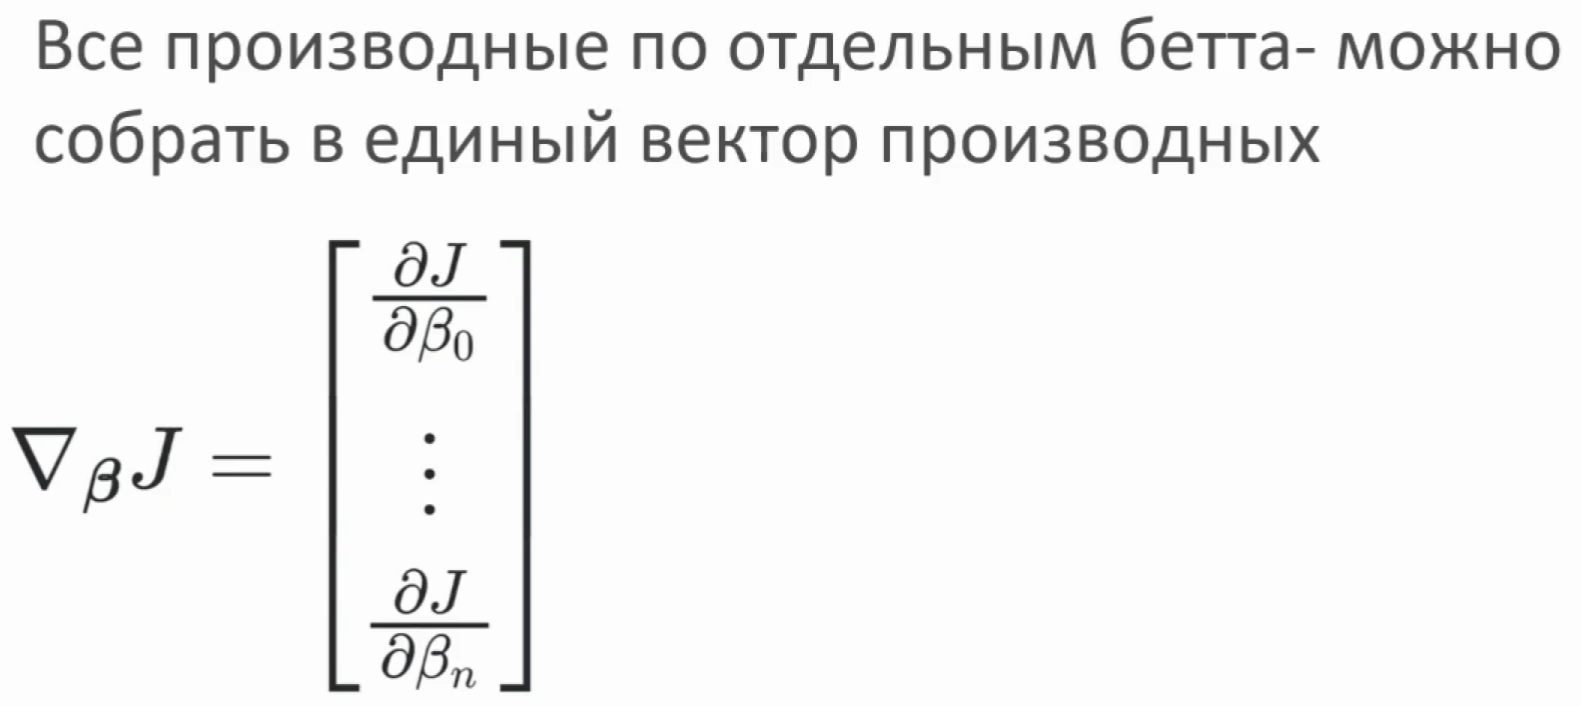

### Сначала делаются большие шаги градинетного спуска, а потом размер шага снижается чтобы не проскочить минимум

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['Total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


### Проверим: есть ли линейная зависимость между сумарными затратами на рекламу и продажами

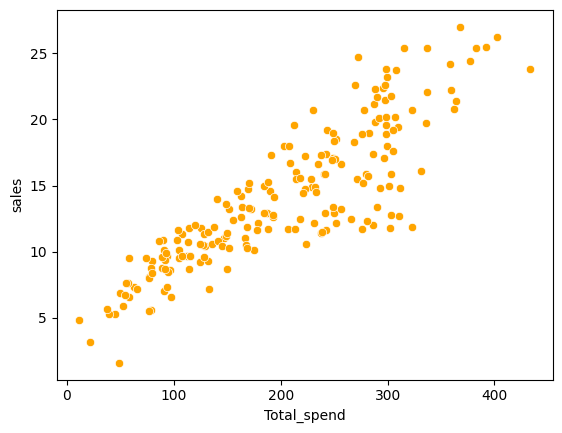

In [4]:
sns.scatterplot(data=df, x='Total_spend', y='sales', color='orange');

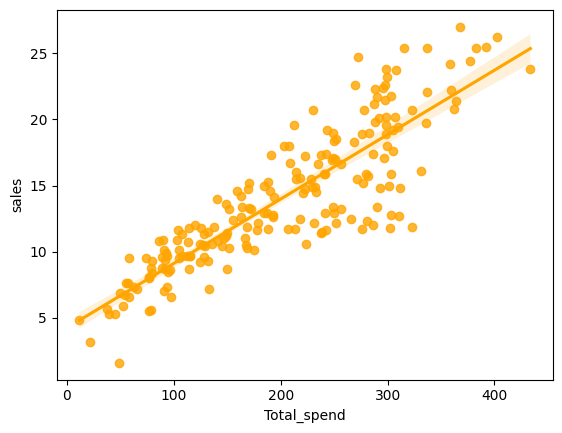

In [8]:
sns.regplot(data=df, x='Total_spend', y='sales', color='orange');

### Наблюдаем прямопропорциональную зависимость!

In [9]:
X = df['Total_spend']
y = df.sales

In [24]:
# Найдем значения коэффициентов парной линейной регрессии
b1, b0 = np.polyfit(x=X, y=y, deg=1)
print(f'b0: {b0:.4f}')
print(f'b1: {b1:.4f}')

b0: 4.2430
b1: 0.0487


In [25]:
potential_spend = np.linspace(start=10, stop=450, num=100)
potential_spend[:10]

array([10.        , 14.44444444, 18.88888889, 23.33333333, 27.77777778,
       32.22222222, 36.66666667, 41.11111111, 45.55555556, 50.        ])

In [26]:
predicted_sales = b0 + b1 * potential_spend
predicted_sales[:10]

array([4.72990701, 4.94629758, 5.16268816, 5.37907873, 5.59546931,
       5.81185988, 6.02825046, 6.24464103, 6.46103161, 6.67742218])

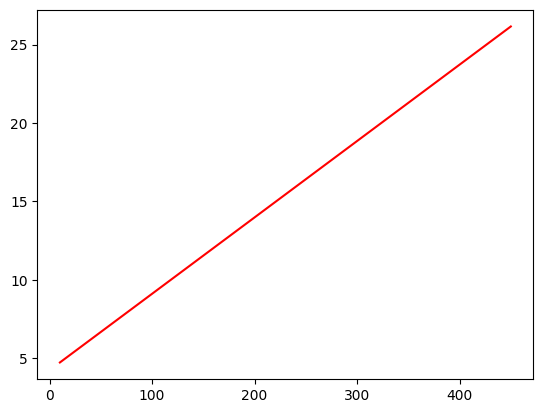

In [27]:
plt.plot(potential_spend, predicted_sales, color='red');

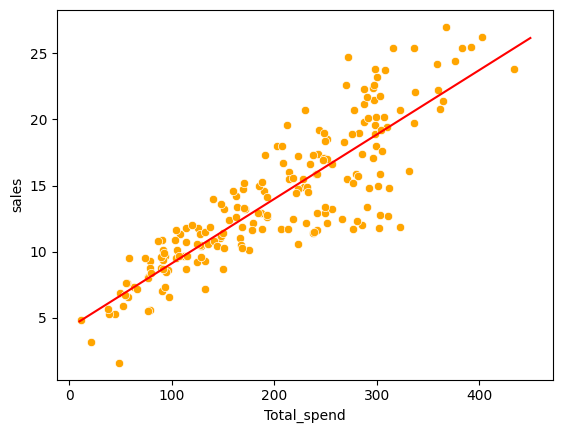

In [28]:
sns.scatterplot(data=df, x='Total_spend', y='sales', color='orange')
plt.plot(potential_spend, predicted_sales, color='red');

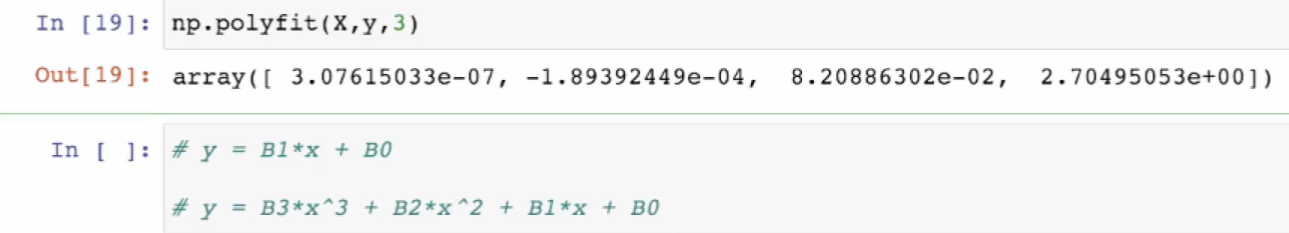

### В Scikit-learn применяется
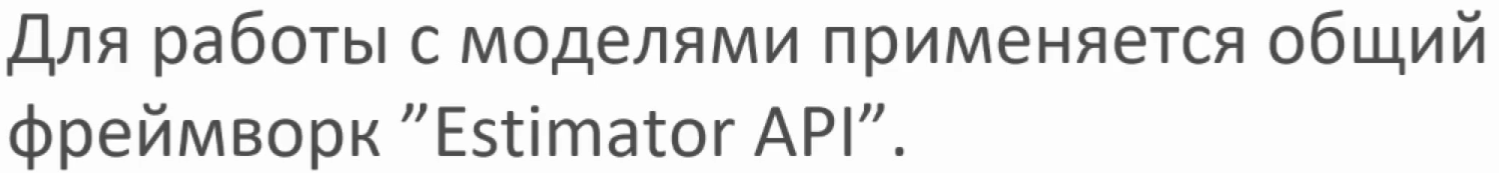

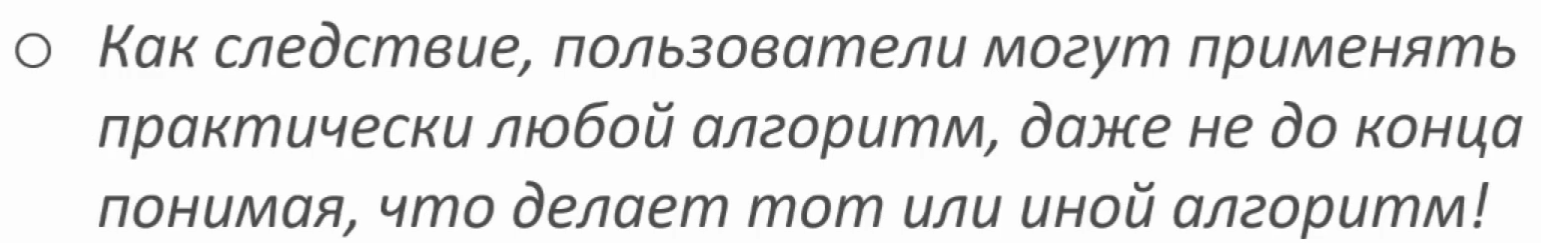

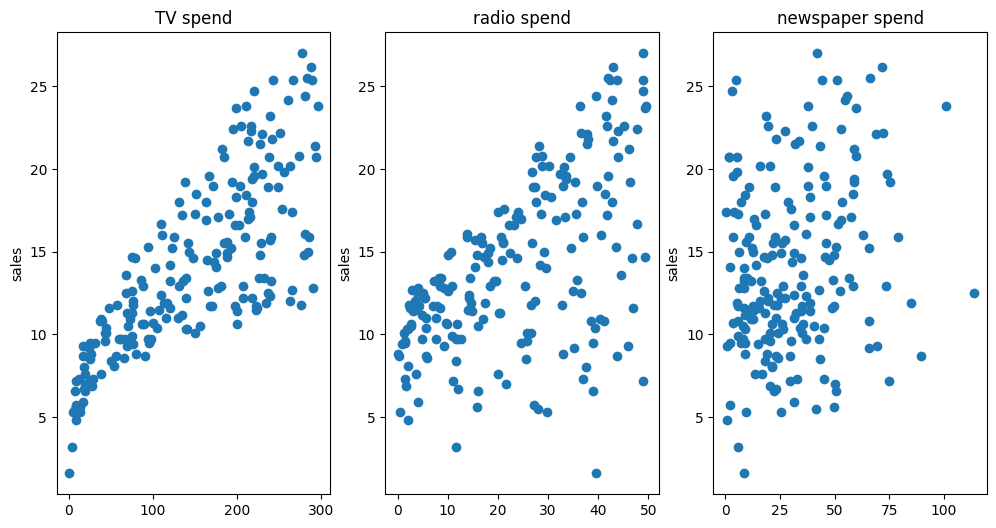

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('sales')
axes[1].set_title('radio spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper spend');

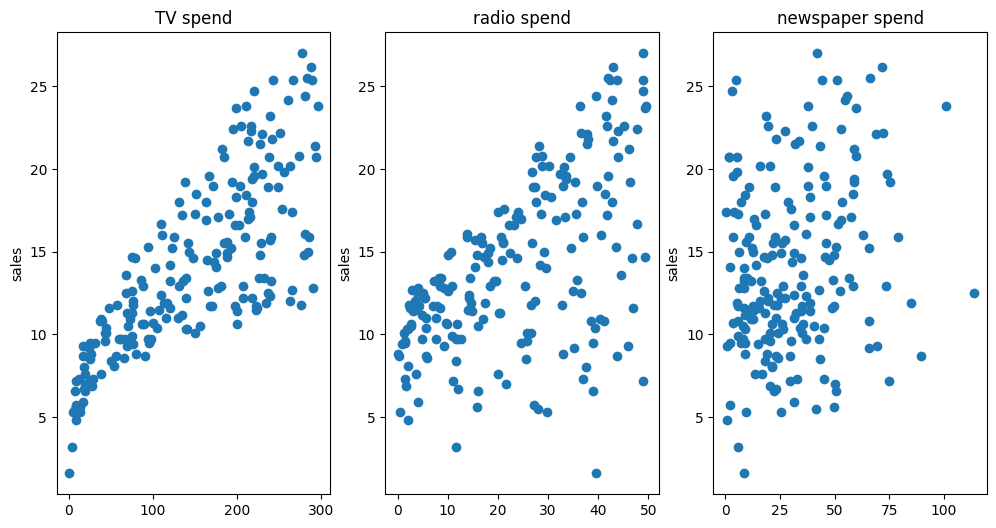

In [36]:
# Переменная fig сохранила все настройки последнего графика
fig

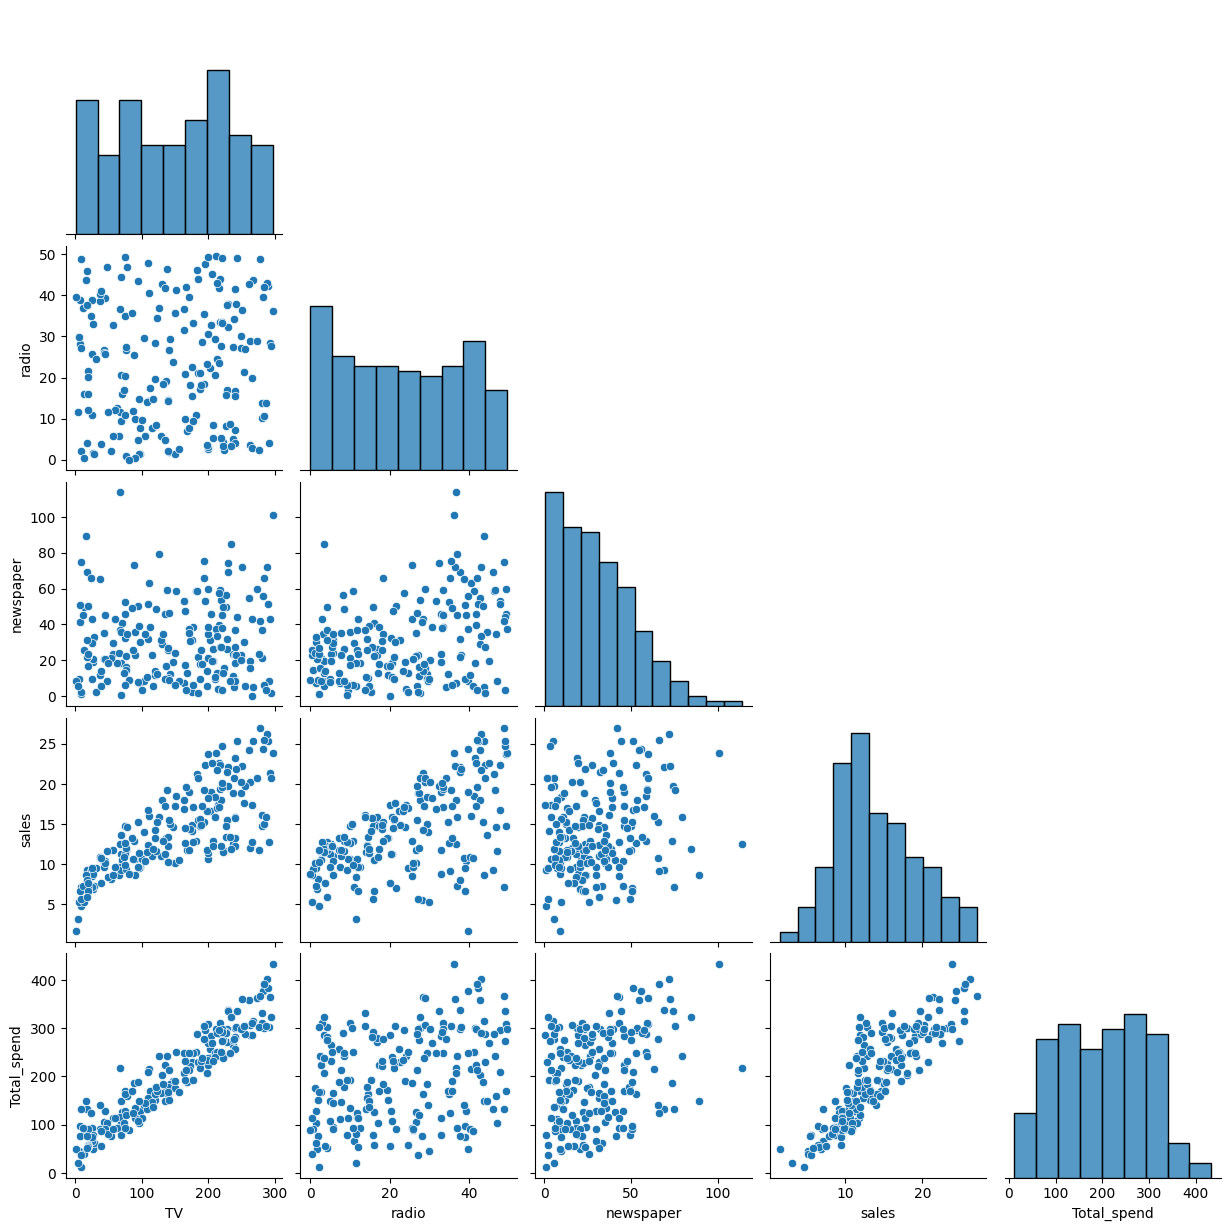

In [40]:
sns.pairplot(data=df, corner=True);

In [41]:
X = df.drop(labels=['Total_spend', 'sales'], axis=1)

In [43]:
X.tail()

,TV,radio,newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [44]:
y = df.sales
y.tail()

195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)
X_train.shape

(134, 3)

In [52]:
# Порядок наблюдений перемешался
y_test

103    14.7
48     14.8
40     16.6
148    10.9
185    22.6
       ... 
191     9.9
8       4.8
187    17.3
5       7.2
161    13.3
Name: sales, Length: 66, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [55]:
model = LinearRegression()
model

LinearRegression()

In [56]:
model.fit(X_train, y_train)
model

LinearRegression()

In [65]:
predictions = model.predict(X_test)
predictions[:10]

array([14.66572365, 16.45593199, 16.38865276, 12.01536528, 20.64883835,
       17.17744862, 14.91421226, 19.47960016, 23.8343598 , 11.85349555])

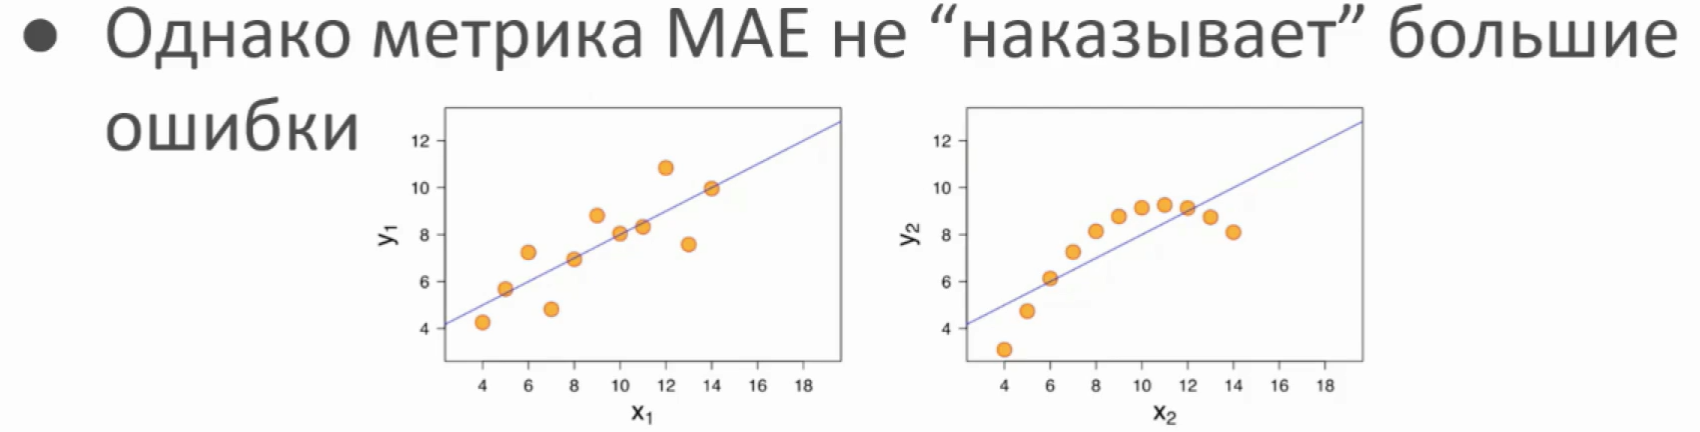

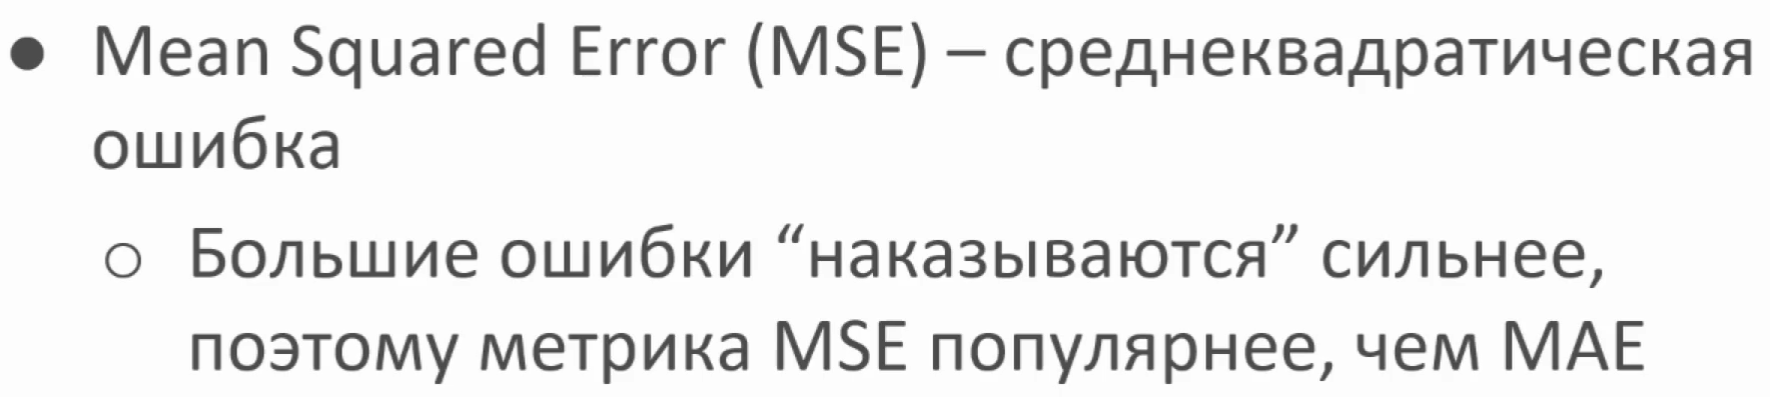

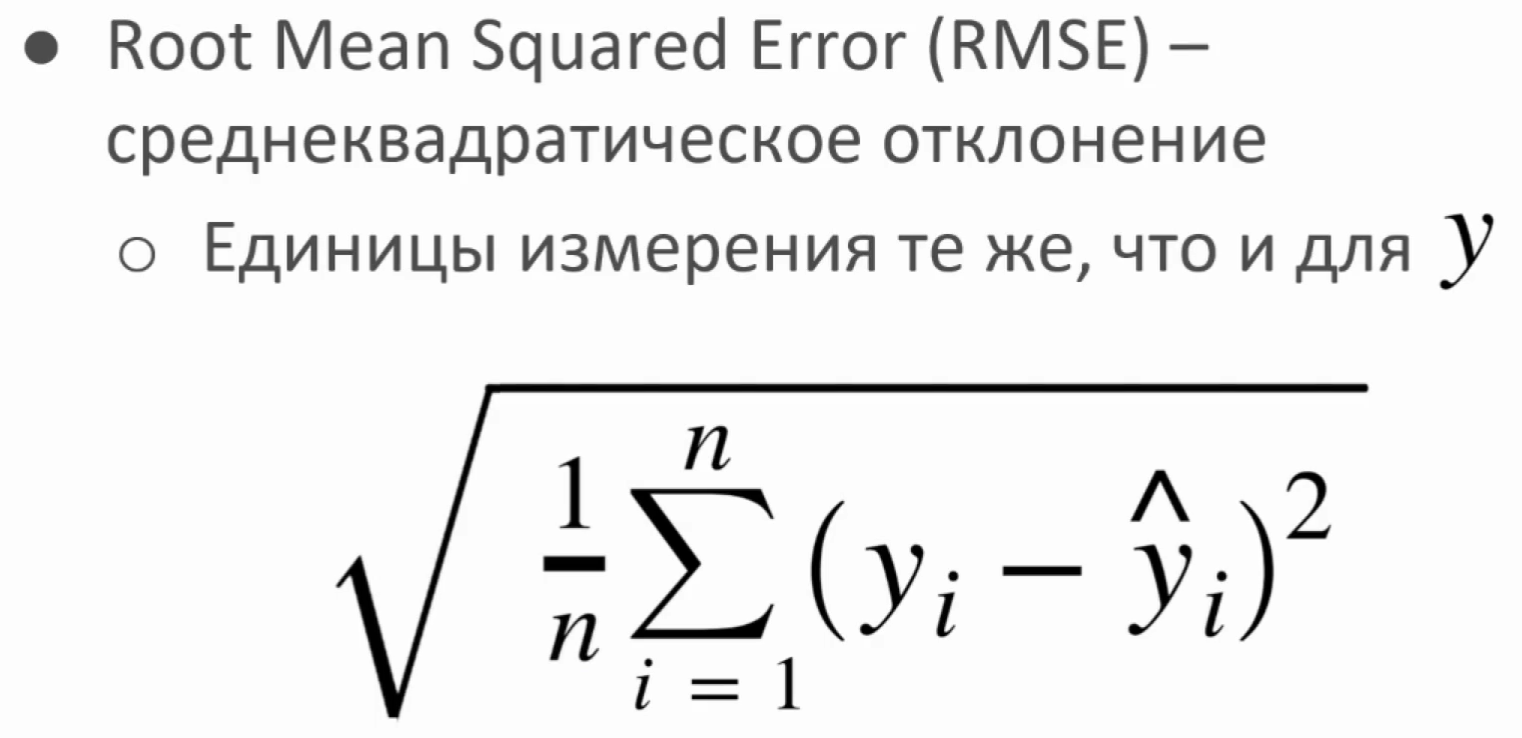

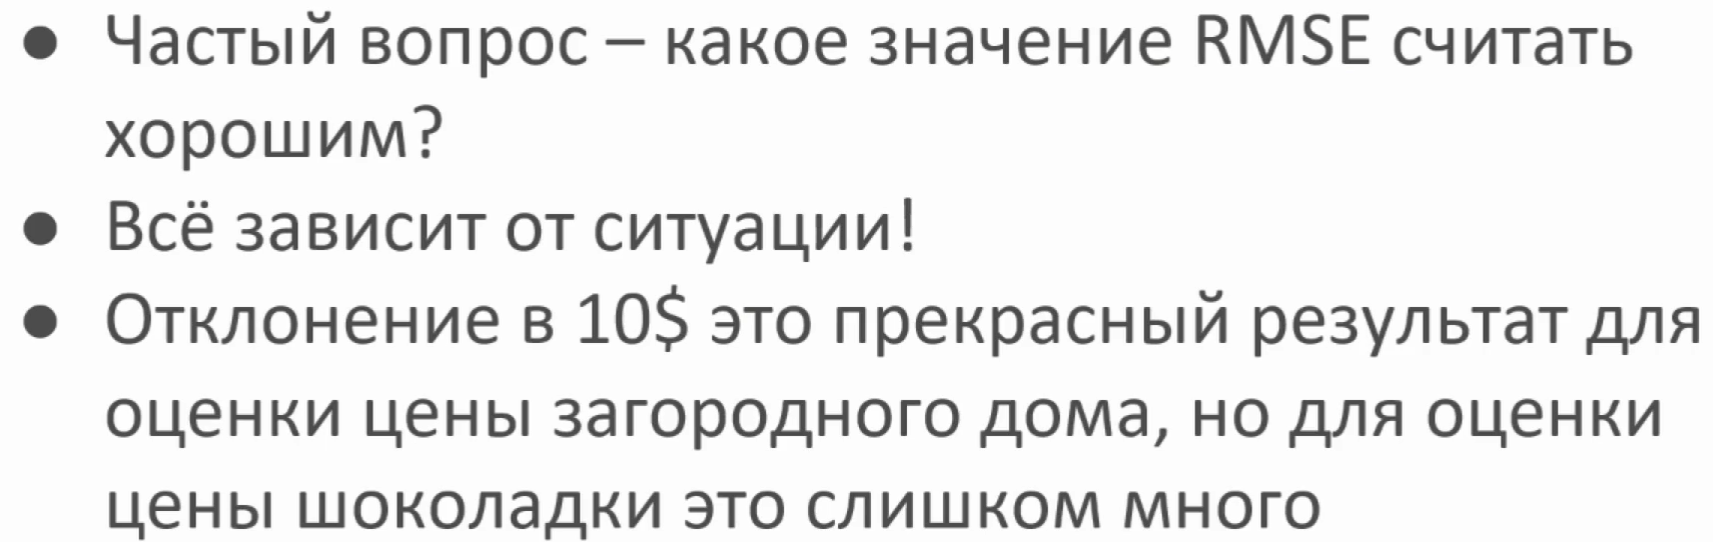

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
print(f'MAE: {mean_absolute_error(y_true=y_test, y_pred=predictions):.4f}')
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=predictions):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions)):.4f}')

MAE: 1.2214
MSE: 2.6919
RMSE: 1.6407


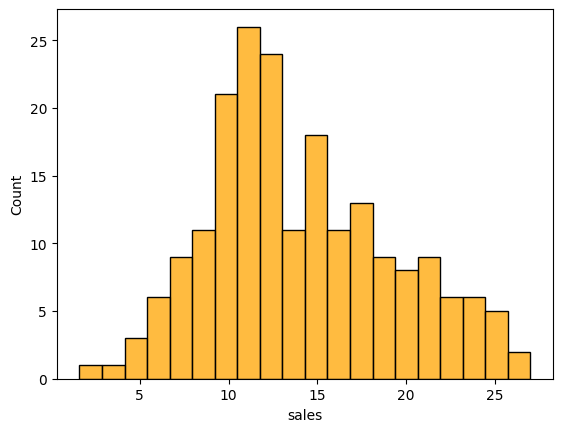

In [69]:
sns.histplot(data=df, x='sales', color='orange', bins=20);

In [70]:
np.mean(df['sales'])

14.0225

### Размер ошибки модели около 10%. Тут важно понять насколько такая ошибка допустима

### Если MAE хорошая, а MSE большая, то скорее всего есть выбросы и модель плохо ведет себя на нескольких точках

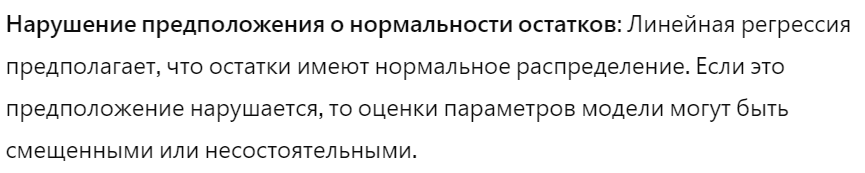

In [75]:
residuals = y_test - predictions
residuals[:10]

103    0.034276
48    -1.655932
40     0.211347
148   -1.115365
185    1.951162
74    -0.177449
162   -0.014212
109    0.320400
101   -0.034360
173   -0.153496
Name: sales, dtype: float64

### Нарисуем график остатков

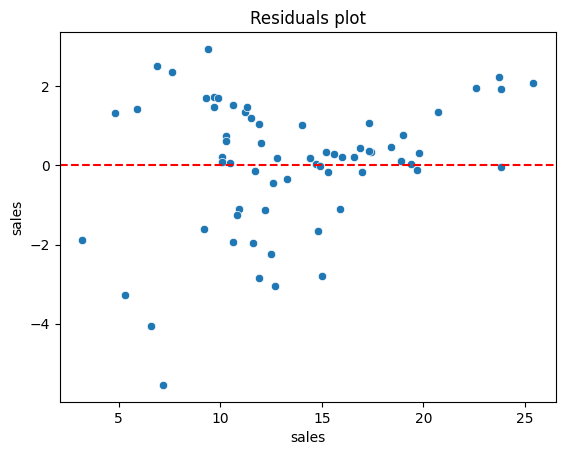

In [76]:
sns.scatterplot(x=y_test, y=residuals)  # residuals = y_true - y_pred
plt.axhline(y=0, color='r', ls='--')
plt.title('Residuals plot');

### Если на графике точки не выстраиваются в некоторую кривую или линию, все остатки должны выглядить более-менее равномерно

### Построим график распределения остатков

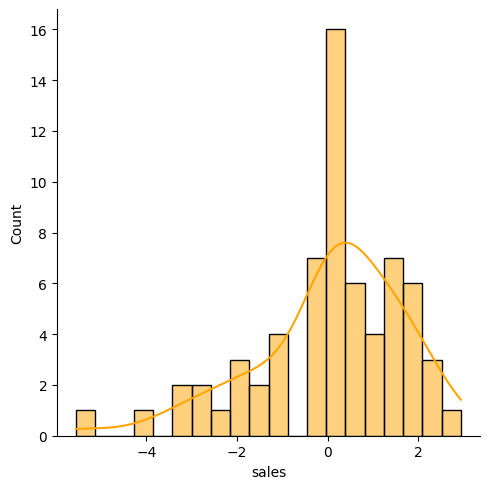

In [79]:
sns.displot(data=residuals, bins=20, kde=True, color='orange');

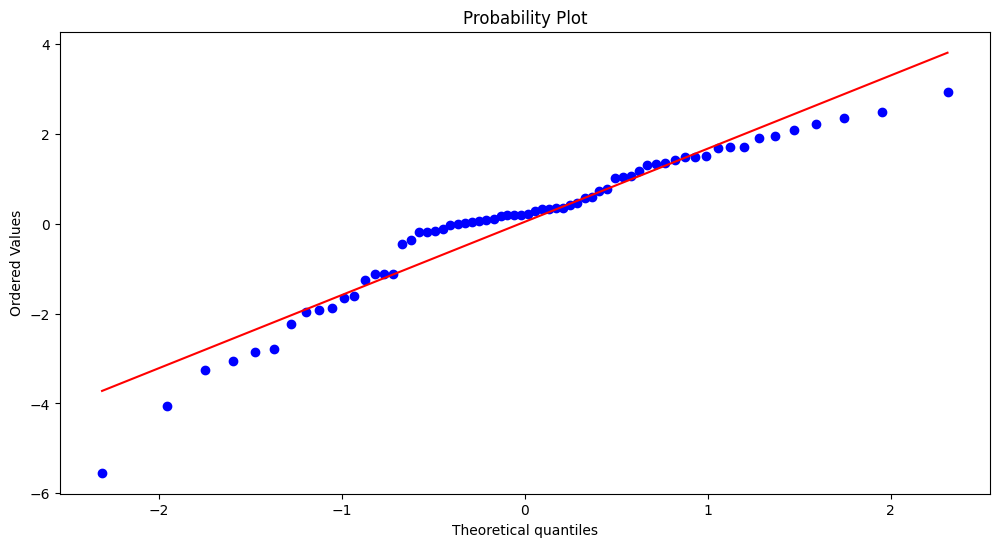

In [80]:
from scipy import stats

fix, ax = plt.subplots(figsize=(12, 6), dpi=100)
stats.probplot(residuals, plot=ax);

### Красная линия - это идеальное нормальное распределение, а синие точки - распределение наших остатков

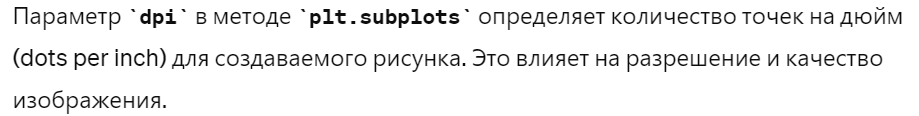

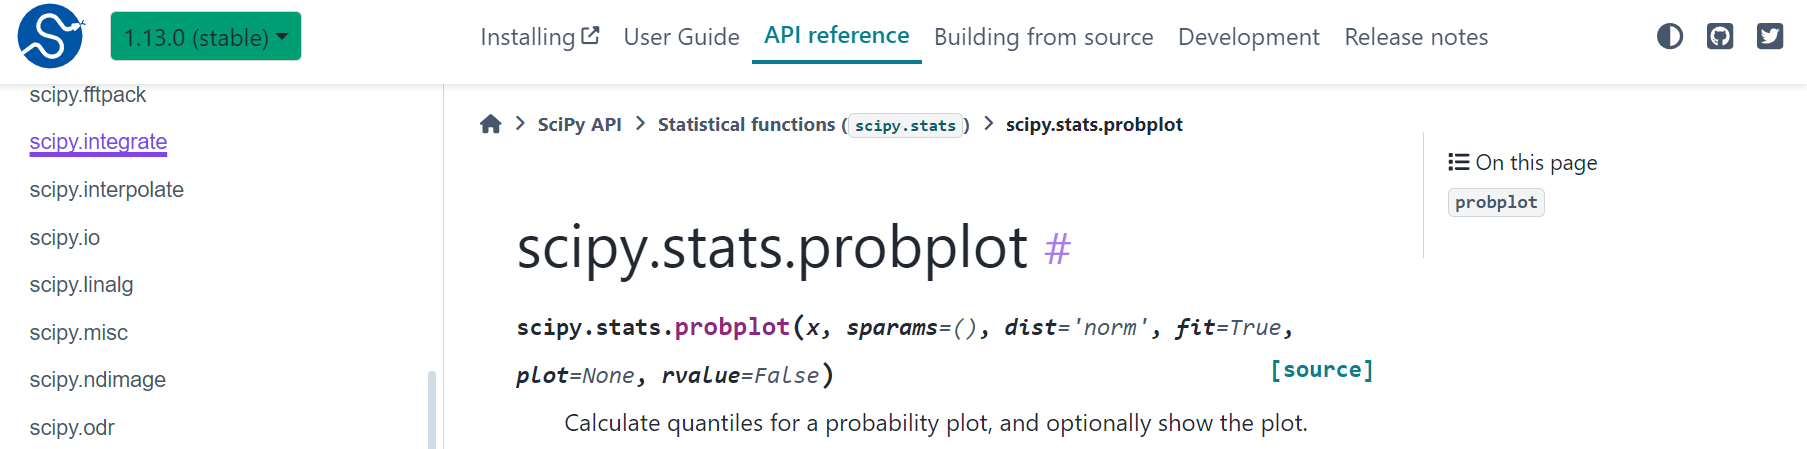